# Feature Engineering for Stroke Prediction

 **Preparing the processed dataset for modeling** 

### Handling missing data

* The BMI column had 201 NaN values. 
* Since the NaN make up roughly 4% of the value count, the best way to impute is by using median.

### Handling imbalance in the target column

* In the EDA analysis, the split represented c95% of 0s vs c5% of 1s. 
* I shall be considering variuos options to balance out a 50/50 split before proceeding to model training.

### Encoding the categorical features

* One hot encoding is my choice for encoding

In [12]:
#Loading the processed dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet('../Data/processed_stroke_data.parquet')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
#Imputing the missing values in bmi column with median value
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

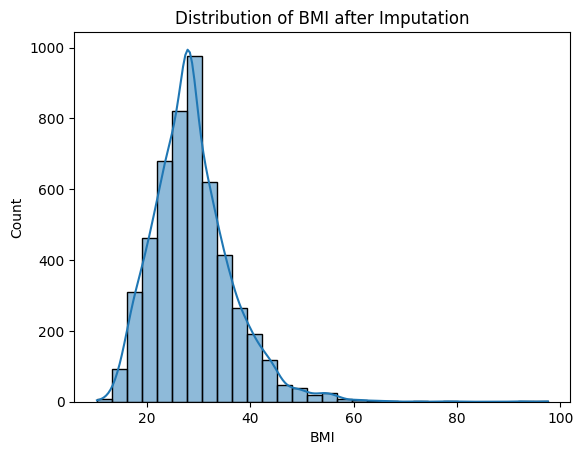

In [20]:
#checking the distribution of BMI after imputation
sns.histplot(df['bmi'], bins=30, kde = True, edgecolor='k')
plt.xlabel('BMI')
plt.title('Distribution of BMI after Imputation')
plt.show()